In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
sample = mnist.train.images[12].reshape(28, 28)

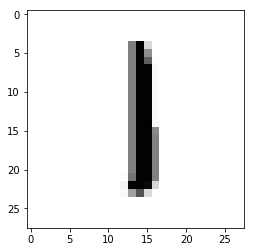

In [4]:
plt.imshow(sample, cmap='Greys')

In [5]:
learning_rate = 0.001
epochs = 1000
batch = 100

In [6]:
n_class = 10
n_samples = mnist.train.num_examples

In [7]:
n_input = 784

In [8]:
n_hidden_1 = 256
n_hidden_2 = 256

In [9]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for data input
    weights: dictionary of weights
    biases: dictionary of biases values
    '''

    # First Hidden Layer with RELU Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Last output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']

    return out_layer

In [10]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_class]))
}

In [11]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_class]))
}

In [12]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_class])

In [13]:
pred = multilayer_perceptron(x, weights, biases)

In [14]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# Training the model

In [15]:
t = mnist.train.next_batch(1)

In [16]:
Xsample, ysample = t

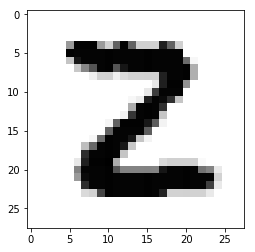

In [17]:
plt.imshow(Xsample.reshape(28, 28), cmap='Greys')

In [18]:
ysample

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

## Run the session

In [19]:
sess = tf.InteractiveSession()

In [20]:
init = tf.global_variables_initializer()

In [21]:
sess.run(init)

In [22]:
from time import time
start = time()
for epoch in range(epochs):

    # Cost
    avg_cost = 0.0

    total_batch = int(n_samples/batch)

    for i in range(total_batch):

        batch_x, batch_y = mnist.train.next_batch(batch)

        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        avg_cost += c/batch
    print(f'Epoch: {epoch+1} cost {avg_cost:.4f}')

print(f'Model has completed {epochs} epochs of train in {time() - start:.2f} seconds')

Epoch: 1 cost 1065.2115
Epoch: 2 cost 228.7591
Epoch: 3 cost 144.5577
Epoch: 4 cost 100.9648
Epoch: 5 cost 73.8178
Epoch: 6 cost 54.3031
Epoch: 7 cost 41.1072
Epoch: 8 cost 30.9958
Epoch: 9 cost 22.7559
Epoch: 10 cost 16.8696
Epoch: 11 cost 13.3249
Epoch: 12 cost 10.2980
Epoch: 13 cost 7.3527
Epoch: 14 cost 5.5879
Epoch: 15 cost 3.9692
Epoch: 16 cost 3.5322
Epoch: 17 cost 3.2629
Epoch: 18 cost 3.4084
Epoch: 19 cost 2.4674
Epoch: 20 cost 1.9449
Epoch: 21 cost 1.7299
Epoch: 22 cost 2.0133
Epoch: 23 cost 2.2769
Epoch: 24 cost 2.0957
Epoch: 25 cost 1.7995
Epoch: 26 cost 1.3717
Epoch: 27 cost 1.5774
Epoch: 28 cost 1.3919
Epoch: 29 cost 1.4900
Epoch: 30 cost 1.5994
Epoch: 31 cost 1.3750
Epoch: 32 cost 1.3185
Epoch: 33 cost 1.4478
Epoch: 34 cost 1.0738
Epoch: 35 cost 0.9642
Epoch: 36 cost 1.2184
Epoch: 37 cost 1.0106
Epoch: 38 cost 1.1532
Epoch: 39 cost 0.9990
Epoch: 40 cost 0.8695
Epoch: 41 cost 0.9382
Epoch: 42 cost 1.1936
Epoch: 43 cost 0.8925
Epoch: 44 cost 0.9610
Epoch: 45 cost 0.8326
Ep

Epoch: 362 cost 0.0000
Epoch: 363 cost 0.0000
Epoch: 364 cost 0.0000
Epoch: 365 cost 0.0000
Epoch: 366 cost 0.0000
Epoch: 367 cost 0.0000
Epoch: 368 cost 0.0000
Epoch: 369 cost 0.0000
Epoch: 370 cost 0.0000
Epoch: 371 cost 0.0000
Epoch: 372 cost 0.0000
Epoch: 373 cost 0.0000
Epoch: 374 cost 0.0000
Epoch: 375 cost 0.0000
Epoch: 376 cost 0.0000
Epoch: 377 cost 0.0000
Epoch: 378 cost 0.0000
Epoch: 379 cost 0.0000
Epoch: 380 cost 0.0000
Epoch: 381 cost 0.0000
Epoch: 382 cost 0.0000
Epoch: 383 cost 0.0000
Epoch: 384 cost 0.0000
Epoch: 385 cost 0.0000
Epoch: 386 cost 0.0000
Epoch: 387 cost 0.0000
Epoch: 388 cost 0.0000
Epoch: 389 cost 0.0000
Epoch: 390 cost 0.0000
Epoch: 391 cost 0.0000
Epoch: 392 cost 0.0000
Epoch: 393 cost 0.0000
Epoch: 394 cost 0.0000
Epoch: 395 cost 0.0000
Epoch: 396 cost 0.0000
Epoch: 397 cost 0.0000
Epoch: 398 cost 0.0000
Epoch: 399 cost 0.0000
Epoch: 400 cost 0.0000
Epoch: 401 cost 0.0000
Epoch: 402 cost 0.0000
Epoch: 403 cost 0.0000
Epoch: 404 cost 0.0000
Epoch: 405 

Epoch: 719 cost 0.0000
Epoch: 720 cost 0.0000
Epoch: 721 cost 0.0000
Epoch: 722 cost 0.0000
Epoch: 723 cost 0.0000
Epoch: 724 cost 0.0000
Epoch: 725 cost 0.0000
Epoch: 726 cost 0.0000
Epoch: 727 cost 0.0000
Epoch: 728 cost 0.0000
Epoch: 729 cost 0.0000
Epoch: 730 cost 0.0000
Epoch: 731 cost 0.0000
Epoch: 732 cost 0.0000
Epoch: 733 cost 0.0000
Epoch: 734 cost 0.0000
Epoch: 735 cost 0.0000
Epoch: 736 cost 0.0000
Epoch: 737 cost 0.0000
Epoch: 738 cost 0.0000
Epoch: 739 cost 0.0000
Epoch: 740 cost 0.0000
Epoch: 741 cost 0.0000
Epoch: 742 cost 0.0000
Epoch: 743 cost 0.0000
Epoch: 744 cost 0.0000
Epoch: 745 cost 0.0000
Epoch: 746 cost 0.0000
Epoch: 747 cost 0.0000
Epoch: 748 cost 0.0000
Epoch: 749 cost 0.0000
Epoch: 750 cost 0.0000
Epoch: 751 cost 0.0000
Epoch: 752 cost 0.0000
Epoch: 753 cost 0.0000
Epoch: 754 cost 0.0000
Epoch: 755 cost 0.0000
Epoch: 756 cost 0.0000
Epoch: 757 cost 0.0000
Epoch: 758 cost 0.0000
Epoch: 759 cost 0.0000
Epoch: 760 cost 0.0000
Epoch: 761 cost 0.0000
Epoch: 762 

## Model evaluation

In [23]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [24]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [25]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [26]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [27]:
accuracy = tf.reduce_mean(correct_predictions)

In [28]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [29]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9746